**Import Libraries**

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [81]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [82]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


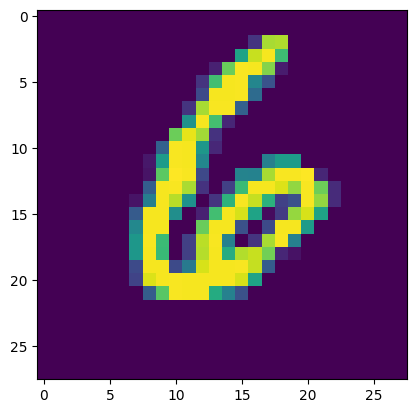

In [83]:
plt.imshow(X_train[13])

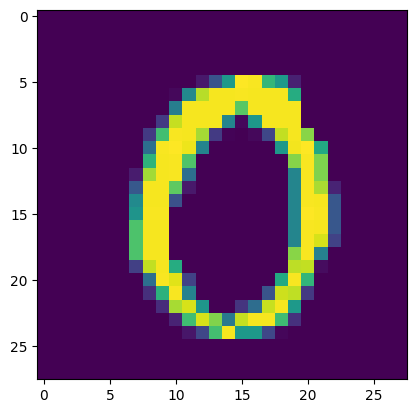

In [84]:
plt.imshow(X_test[13])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [85]:
num_pixels = X_train.shape[1]*X_train.shape[2]  # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')   # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')      # flatten test images

In [86]:
X_train.shape

(60000, 784)

In [87]:
X_train[0][150:200]

array([  0.,   0.,   3.,  18.,  18.,  18., 126., 136., 175.,  26., 166.,
       255., 247., 127.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  30.,  36.,  94., 154., 170., 253., 253.,
       253., 253., 253., 225., 172., 253., 242., 195.,  64.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [88]:
X_train = X_train/255
X_test = X_test/255

In [89]:
X_train[0][150:200]

array([0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11764706, 0.14117648, 0.36862746, 0.6039216 ,
       0.6666667 , 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.88235295, 0.6745098 , 0.99215686, 0.9490196 ,
       0.7647059 , 0.2509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [90]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
num_classes = y_test.shape[1]
print(num_classes)

10


### Build Model

In [101]:
def classification_model():
    model = Sequential()
    model.add(Input(shape=(num_pixels, )))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Train and Test Model**

In [131]:
# Build the model
model = classification_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 13s - loss: 3.3412 - accuracy: 0.8129 - val_loss: 6.3423 - val_accuracy: 0.8107 - 13s/epoch - 7ms/step
Epoch 2/10
1875/1875 - 12s - loss: 15.9508 - accuracy: 0.7995 - val_loss: 20.5588 - val_accuracy: 0.7936 - 12s/epoch - 7ms/step
Epoch 3/10
1875/1875 - 12s - loss: 33.8376 - accuracy: 0.7992 - val_loss: 42.1836 - val_accuracy: 0.8086 - 12s/epoch - 7ms/step
Epoch 4/10
1875/1875 - 13s - loss: 58.6853 - accuracy: 0.7957 - val_loss: 71.6233 - val_accuracy: 0.8149 - 13s/epoch - 7ms/step
Epoch 5/10
1875/1875 - 13s - loss: 84.0304 - accuracy: 0.8008 - val_loss: 70.8812 - val_accuracy: 0.8289 - 13s/epoch - 7ms/step
Epoch 6/10
1875/1875 - 13s - loss: 108.8997 - accuracy: 0.8005 - val_loss: 111.5000 - val_accuracy: 0.8090 - 13s/epoch - 7ms/step
Epoch 7/10
1875/1875 - 13s - loss: 142.0704 - accuracy: 0.8023 - val_loss: 126.9698 - val_accuracy: 0.8128 - 13s/epoch - 7ms/step
Epoch 8/10
1875/1875 - 13s - loss: 180.2211 - accuracy: 0.7988 - val_loss: 541.0521 - val_accuracy: 0.

Let's print the accuracy and the corresponding error.

In [133]:
print('Loss: {} \nAccuracy: {}% \nError: {}'.format(score[0], 100*score[1], 1-score[1]))

Loss: 230.8811492919922 
Accuracy: 82.28999972343445% 
Error: 0.17710000276565552


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [134]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


When you are ready to use your model again, you use the load_model function from <strong>keras.saving</strong>.


In [135]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [136]:
pretrained_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 230.8811 - accuracy: 0.8229


[230.8811492919922, 0.8228999972343445]

### Create a neural network model with 6 dense layers and compare its accuracy


In [137]:
def classification_model_6_layers():
    model = Sequential()

    model.add(Input(shape=(num_pixels, )))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Model building**

In [140]:
model_6 = classification_model_6_layers()
model_6.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2)
score_6 = model_6.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {score_6[0]:.3f} \nAccuracy: {100*score_6[1]:.3f}% \nError: {1-score_6[1]:.3f}')

1875/1875 - 15s - loss: 240034288.0000 - accuracy: 0.3424 - val_loss: 1652911872.0000 - val_accuracy: 0.3369 - 15s/epoch - 8ms/step
Loss: 1652911872.000 
Accuracy: 33.690% 
Error: 0.663


**Load pretrained model and train again for 10 more epochs**

In [139]:
pretrained_model = keras.saving.load_model('classification_model.keras')

pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2)
score_20 = pretrained_model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy for 10 epochs: {100*score[1]:.3f}% \nAccuracy for 20 epochs: {100*score_20[1]:.3f}')

1875/1875 - 13s - loss: 294.4700 - accuracy: 0.8091 - val_loss: 690.9075 - val_accuracy: 0.7468 - 13s/epoch - 7ms/step
Accuracy for 10 epochs: 82.290% 
Accuracy for 20 epochs: 74.680
